# Practice Session 09: Viral Propagation

We will use [NetworkX](https://networkx.github.io/) for simulating propagations through a network.

We will use the [SFHH Conference Dataset](http://www.sociopatterns.org/datasets/sfhh-conference-data-set/), which approximately describes face to face interactions between 403 attendees to an academic conference in 2009 that took place in Nice, France. These 403 attendees agred to wear a badge containing an RFID tag and receiver which picked up signals from other RFID tags, and which allowed to log (anonymously) timestamps corresponding to being in close proximity of each other.

The dataset you will use is contained on the file `sfhh-conference-2009.csv` and for simplicity does not include the time variable that is present in the original dataset.


# 1. The SFHH Conference Dataset

Code to load and do a default drawing of the graph.

In [1]:
import io
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
INPUT_FILENAME = "sfhh-conference-2009.csv"

In [3]:
# Create a new undirected graph
g = nx.Graph()

with io.open(INPUT_FILENAME) as input_file:
    # Create a CSV reader for a comma-delimited file with a header
    reader = csv.DictReader(input_file, delimiter=',')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        
        # Add one edge per record
        g.add_edge(record['Source'], record['Target'])

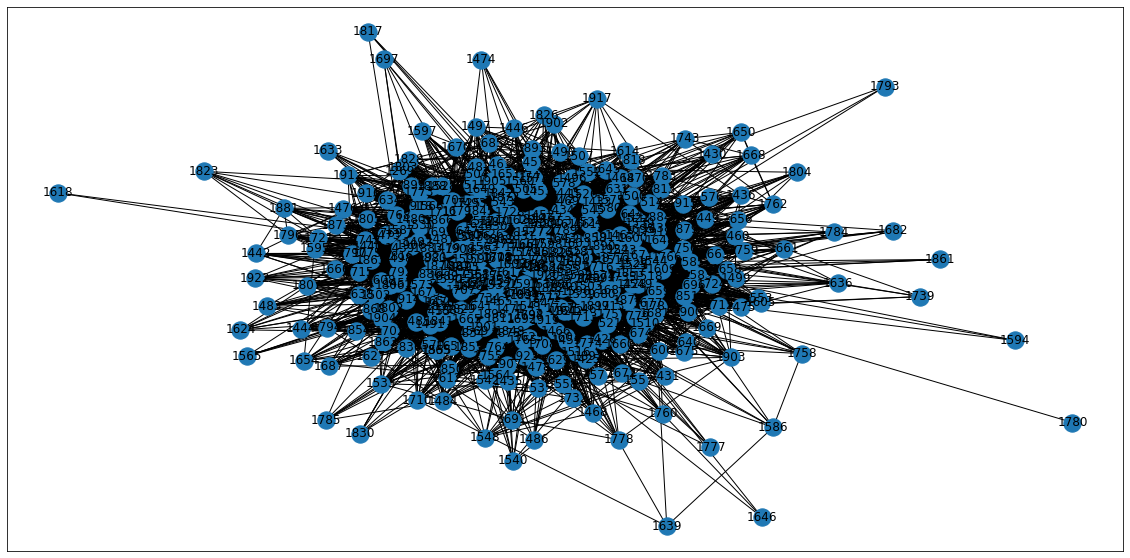

In [4]:
# Create an empty figure; feel free to change size to accommodate to your screen
plt.figure(figsize=(20,10))

# Draw the graph
nx.draw_networkx(g)

In [11]:
print("There are "+ str(g.number_of_nodes())+ " nodes and "+ str(g.number_of_edges())+ " edges")

There are 403 nodes and 9565 edges


There are 403 nodes and 9565 edges. It seems that there is one big connected component, and it is like these dense graphs we have seen in theory lectures(tt_19) in which the center looks like a hair ball. We can't obtain much more information just looking at the graph, it is very dense.

# 2. Independent cascade model

Next, we will simulate the independent cascade propagation model. We will assume each edge has the same probability of transmission, *0 < beta < 1*.

Your algorithm should do the following:

1. Initialize an `infected` dictionary with every node having value `False`
1. Mark a starting node *u* as infected with value `True`
1. For each neighbor *v* of this node:
  * If the neighbor *v* is not infected:
    * Generate a random r number in [0, 1] using [random.uniform](https://docs.python.org/3/library/random.html)
    * If r is smaller than the probability of transmission of edge *(u,v)*:
      * Infect node *v*
1. Return the `infected` dictionary

Your code should look like this:

```python
def infect_recursive(graph, starting_node, beta, infected):
    # YOUR CODE HERE

def simulate_independent_cascade(graph, starting_node, beta):
    infected = dict([(node, False) for node in graph.nodes()])
    # YOUR CODE HERE
    return infected
```

Tip: use an auxiliary function `infect_recursive(graph, node, beta, infected)` that takes as input a *graph*, a *node* to be infected, the transmission probability *beta*, the dictionary *infected* and infects node *node* and tries to infect all the neighbors of node (`graph.neighbors(node)`

In [47]:
def infect_recursive(graph, starting_node, beta, infected):
     for neighbor in graph.neighbors(starting_node):#For each neighbor v of this node:
        if infected[neighbor]==False:#if the neighbour is not infected
            r=random.random()#Generate a random number in [0, 1]
            if (r<beta):#f r is smaller than the probability of transmission of edge (u,v)
                infected[neighbor]=True#infect node v
                infect_recursive(graph,neighbor , beta, infected)

def simulate_independent_cascade(graph, starting_node, beta):
    infected = dict([(node, False) for node in graph.nodes()])#Initialize an infected dictionary with every node having value False
    infected[starting_node]=True #Mark a starting node u as infected with value True
    infect_recursive(graph, starting_node, beta, infected)
 
    
    return infected

Next, write function `simulate_multiple_independent_cascades(graph, beta, repetitions)` that takes as input a graph and a transmisibility parameter *beta*, and a number of trials *repetitions* and repeats *repetitions* times the following:

1. Picks a random node in the graph, using `random.choice(list(g.nodes()))`
1. Simulate an independent cascade starting from that node

The function should return the average number of infected nodes across the *repetitions* done. 

Tip: to get the number of `True` values in the values of a dictionary `d`, you can just use `sum(d.values())`.

In [48]:
def simulate_multiple_independent_cascades(graph, beta, repetitions):
    total=0
    for i in range (1,repetitions+1):
        starting_node=random.choice(list(graph.nodes()))
        simulate=simulate_independent_cascade(graph, starting_node, beta)
        total=total+sum(simulate.values())
        
    average=total/repetitions
    return average


Create a plot that should have in the x axis the transmission probability *beta*, and in the y axis the expected fraction of infected nodes. Remember to label both axis. You can use the following code as a template, but remember to set figure size and *include labels* in the plot.


Text(0, 0.5, 'Expected fraction of infected')

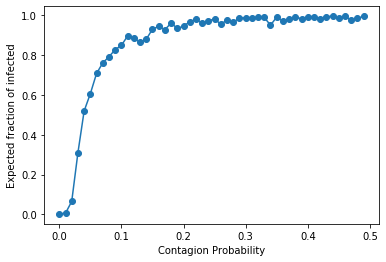

In [52]:
STARTING_PROB = 0
ENDING_PROB = 0.5
STEP_PROB = 0.01
REPETITIONS = 100

beta_values = []
infected_values = []

for beta in np.arange(STARTING_PROB, ENDING_PROB, STEP_PROB):
    n_infected = simulate_multiple_independent_cascades(g,beta, REPETITIONS)#beta,repetitions
    beta_values.append(beta)
    infected_values.append(n_infected/g.number_of_nodes())

_ = plt.plot(beta_values, infected_values, 'o-')
plt.xlabel("Contagion Probability")
plt.ylabel("Expected fraction of infected")

We can appreciate that at the begining as we increase the probability the expected fraction of infected nodes increases very quickly. This is until the prob= 0.1, in which we get an expected value of around 80% of infected nodes. From probability 0.1 to 0.2 we have a lower increase for each increase in prob, and finally from 0.2 to 0.5 the increase is very little. This is because when prob is around 0.2 almost all nodes are infected, it seems that around 93%.

# 3. Reduce maximum degree

Next, we will simulate what happens if we reduce the degree of nodes so that it is always less than a certain number. We will start by looking at the degree distribution in this plot.

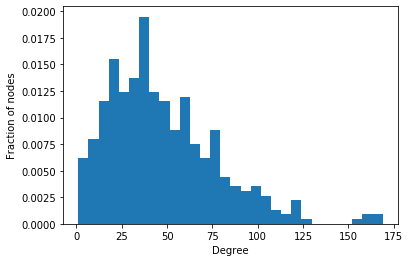

In [8]:
# Function to plot degree distribution
# adapted from https://stackoverflow.com/a/53970607/1235784
def plot_degree_dist(graph):
    
    # Obtain the sequence of degree of nodes
    degrees = [graph.degree(node) for node in graph.nodes()]
    
    # Draw the histogram of the degree
    plt.hist(degrees, density=True, bins=30)
    plt.xlabel("Degree")
    plt.ylabel("Fraction of nodes")
    plt.show()
    
plot_degree_dist(g)

Create a function `graph_max_degree(graph, max_degree)` that returns a copy of *graph* in which no node has degree larger than *max_degree*. 

There are many ways of doing this, a relatively easy one is this:

1. Create an empty graph
1. Iterate through all nodes in the input graph, creating that node in the output graph
1. Obtain the list of edges of the inpu graph with `g.edges()`
1. Randomly shuffle that list of edges using `np.random.permutation()`
1. Add each edge *(u,v)* to the output graph as long as the degree of the *u* and the edge of *v* is smaller than max_degree


In [53]:
def graph_max_degree(g, max_degree):
    new_graph=nx.Graph()#Create an empty graph
    for u in g:#Iterate through all nodes in the input graph, creating that node in the output graph
        new_graph.add_node(u)
    edges=g.edges()#Obtain the list of edges of the input graph
    edges=np.random.permutation(edges)#Randomly shuffle that list of edges
    
    for edge in edges:
        if(new_graph.degree(edge[0])<=max_degree and new_graph.degree(edge[1])<=max_degree):#Add each edge (u,v) 
            #to the output graph as long as the degree of the u and the edge of v is smaller than max_degree
            new_graph.add_edge(edge[0],edge[1])
            
    return new_graph
            
    
    

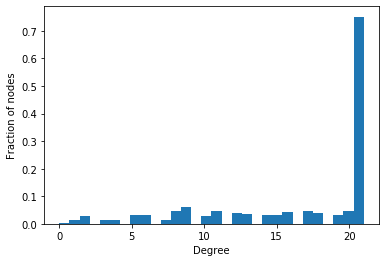

In [54]:
# Test the output of your function graph_max_degree
gmax = graph_max_degree(g, 20)

# If you notice nodes with degree larger than specified,
# it means your graph_max_degree function is deffective.
plot_degree_dist(gmax)

Now, let us assume beta has a constant value *BETA=0.1*, which we will use for the following experiments. That means that only 1 in 10 encounters between an infected and a susceptible person will produce an infection.

Create a graph that has in the x axis the maximum degree allowed, and on the y axis the fraction of infected nodes on the graph. Perform experiments setting the maximum degree to 2, 3, 4, 5, ..., 99, 100. Remember to repeat each experiment at least *REPETITION* times (100) and plotting the average. Remember to include labels in your plot's axes.

Text(0, 0.5, 'Fraction of nodes')

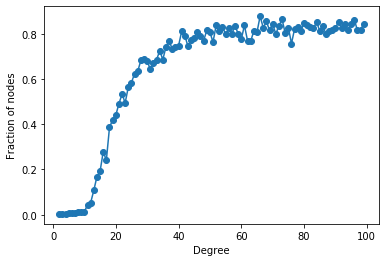

In [11]:
BETA=0.1
STARTING_DEGREE = 2
ENDING_DEGREE = 100
STEP_DEGREE = 1
REPETITIONS = 100

max_degree = []#XLABEL
infected_values = []

for degree in np.arange(STARTING_DEGREE, ENDING_DEGREE, STEP_DEGREE):
    g_new=graph_max_degree(g,degree)
    n_infected = simulate_multiple_independent_cascades(g_new,BETA, REPETITIONS)#beta,repetitions
    max_degree.append(degree)
    infected_values.append(n_infected/g.number_of_nodes())

_ = plt.plot(max_degree, infected_values, 'o-')
plt.xlabel("Degree")
plt.ylabel("Fraction of nodes")

It seems that when we let the maximum degree be more than 10, the infected nodes start to increase very quickly until around degree 40. With a BETA of 0.1, when we let the degree to be more than 40 we tend to have around 80% of the nodes infected, which seems like is more a restriction of beta rather than the degree.
If we wanted to have less than half of the people infected we should set the maximum degree to a value close to 20.

# 4. Random immunization

Finally, we will immunize some nodes. These nodes cannot catch the infection. We will create a `immunity` dictionary in which keys are nodes and `immunity[node] = True` if and only if the *node* cannot be infected.


Write function `give_immunity(graph, fraction)` that returns a dictionary in which keys are the nodes in *graph* and `fraction * graph.number_of_nodes()` nodes are immune.

Write functions `simulate_independent_cascade_immune` and `infect_recursive_immune` as variations of your previous code that receive as extra parameter this dictionary.

In [55]:
def give_immunity(g, fraction):
    immunity = dict([(node, False) for node in g.nodes()])#immunity dict
    immunes=np.random.permutation(g.nodes())#indexes ordered at reandom
    number=int(fraction*g.number_of_nodes())#number of nodes we imunize
    for i in range(number):#immunize the first nodes of our random list
        immunity[immunes[i]]=True
    return immunity

def infect_recursive_immune(graph, starting_node, beta, infected,immunity):
     for neighbor in graph.neighbors(starting_node):
        if infected[neighbor]==False and immunity[neighbor]==False:#takes into account the immunity
            r=random.random()
            if (r<beta):
                infected[neighbor]=True#
                infect_recursive_immune(graph,neighbor , beta, infected,immunity)
                

def simulate_independent_cascade_immune(graph, starting_node, beta, immunity):
    infected = dict([(node, False) for node in graph.nodes()])
    infected[starting_node]=True 
    infect_recursive_immune(graph, starting_node, beta, infected,immunity)
 
    
    return infected

def simulate_multiple_independent_cascades_immune(graph, beta, repetitions):
    total=0
    for i in range (1,repetitions+1):
        starting_node=random.choice(list(graph.nodes()))
        immune=give_immunity(g, fraction)
        simulate=simulate_independent_cascade_immune(graph, starting_node, beta,immune)
        total=total+sum(simulate.values())
        
    average=total/repetitions
    return average


Perform simulations in which you immunize a fraction of nodes *0.00, 0.05, 0.10, ..., 1.00*, repeating at least *REPETITIONS = 100* times each simulation, and plot a graph in which in the x axis is the fraction of immunized nodes and in the y axis the fraction of infected nodes. Assume a constant *BETA=0.1*. At each repetition, you should pick a random node, immunize the requested fraction of nodes, and run the independent cascade model.

Text(0, 0.5, 'Fraction of infected nodes')

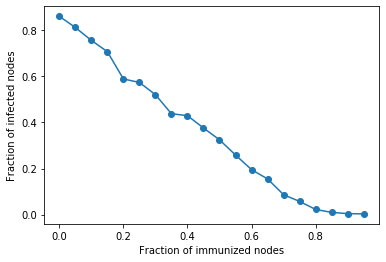

In [13]:
BETA=0.1
STARTING_IMMUNE = 0
ENDING_IMMUNE = 1
STEP_DEGREE = 0.05
REPETITIONS = 100

immunized_nodes = []#XLABEL
infected_nodes = []

for fraction in np.arange(STARTING_IMMUNE, ENDING_IMMUNE, STEP_DEGREE):
    starting_node=random.choice(list(g.nodes()))
    n_infected = simulate_multiple_independent_cascades_immune(g,BETA,REPETITIONS)
    immunized_nodes.append(fraction)
    infected_nodes.append(n_infected/g.number_of_nodes())

_ = plt.plot(immunized_nodes,infected_nodes, 'o-')
plt.xlabel("Fraction of immunized nodes")
plt.ylabel("Fraction of infected nodes")

When we immunize a fraction of the nodes, the fraction of infected nodes decrease linearly to an increase in the fraction of immunized nodes, but not in the whole graph, only until the immunized nodes are around 80%. At this point the infected nodes is near 0, so from 0.8 to 1, the decrease of infected nodes is sub-linear.

# 4.2 Target immunization


One more immunization strategy: "targeted immunization", in which the people who receive the vaccine are the people with the largest degree. Plot one graph of percentage immunized vs fraction infected comparing the two strategies: random immunization and targeted immunization. Add a brief commentary with your conclusions.

Text(0, 0.5, 'Fraction of infected nodes')

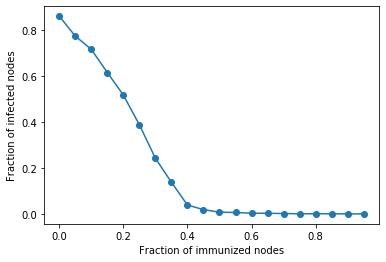

In [42]:
import operator
def give_immunity_targeted(g, fraction):
    immunity = dict([(node, False) for node in g.nodes()])
    degree=dict([(node, g.degree(node)) for node in g.nodes()])#dictionary of degrees
    
    sorted_degree = sorted(degree.items(), key=operator.itemgetter(1), reverse=True)#we obtain the nodes ordered by degree
    number=int(fraction*g.number_of_nodes())#number of immunized nodes

    for i in range(number):
        node=sorted_degree[i][0]#we got the immunized nodes starting from the nodes with higher degree
        immunity[node]=True
         
    return immunity

def simulate_multiple_independent_cascades_immune_targeted(graph, beta, repetitions):#the previous function is adapted to  give_immunity_target
    total=0
    for i in range (1,repetitions+1):
        starting_node=random.choice(list(graph.nodes()))
        immune=give_immunity_targeted(g, fraction)#this is the only change
        simulate=simulate_independent_cascade_immune(graph, starting_node, beta,immune)
        total=total+sum(simulate.values())
        
    average=total/repetitions
    return average


BETA=0.1
STARTING_IMMUNE = 0
ENDING_IMMUNE = 1
STEP_DEGREE = 0.05
REPETITIONS = 100

immunized_nodes = []#XLABEL
infected_nodes = []

for fraction in np.arange(STARTING_IMMUNE, ENDING_IMMUNE, STEP_DEGREE):
    starting_node=random.choice(list(g.nodes()))
    n_infected = simulate_multiple_independent_cascades_immune_targeted(g,BETA,REPETITIONS)
    immunized_nodes.append(fraction)
    infected_nodes.append(n_infected/g.number_of_nodes())

_ = plt.plot(immunized_nodes,infected_nodes, 'o-')
plt.xlabel("Fraction of immunized nodes(targeted)")
plt.ylabel("Fraction of infected nodes")



The target immunization it is more effective than the previous case, the decreasement od infected nodes is linear, as before, but the slope is higher. Therefore, with a less fraction of immuned nodes we achieve a lower value of infected nodes than before. In this case, we can achieve almost a 0% of infected nodes with a 40% of the people inmunized, while before we needed an 80%. From 0.4 to 1, this decreasement is very little or inexistent.

# 5. Conclusions

There are some limitations in the model we have seen, for example there is the same probability of infecting each neighbor when you have much more probabilities to infect people you expend more time with. 
As we have comproved at first hand, in the theory it seems a factible solution to simply reduce the degree of each person, but it is just a short a term solutuion. In reality you can't reduce the degree of a node forever and if you do it in the wrong way, these nodes will get angry and cause more problems.
Also there is more than one chance to infect someone than just, so if the first time a node is not infected it doesn't mean that he can't get infected in the future.
Finally, this model does not consider a recuperation, therefore if you get infected, you will be infected forever.

For all these reasons, this model does not provide enough considerations to make general conclusions to deal with a pandemic.